In [1]:
import sys
sys.path.append('..')

# standard python imports
import numpy as np
import matplotlib.pyplot as plt

# tidy3D import
import tidy3d as td
from pepper import SimulationFdfd
from pepper import GaussianBeamFdfd

[13:44:04] INFO     Using client version: 1.9.1                                                     ]8;id=690651;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/__init__.py\__init__.py]8;;\:]8;id=555417;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/__init__.py#115\115]8;;\

In [2]:
x_span = 10.
y_span = 10.

In [3]:
wl = 1.55

In [4]:
n_bg = 1.0
background = td.Medium(permittivity=n_bg**2)

In [5]:
# wavelength range of interest
lambda_beg = 1.0
lambda_end = 2.0

# define pulse parameters
freq_beg = td.C_0 / lambda_end
freq_end = td.C_0 / lambda_beg
freq0 = (freq_beg + freq_end) / 2
fwidth = (freq_end - freq0) / 1.5

min_steps_per_wvl = 30
run_time = 1e-11


source = td.GaussianBeam(
    size=[0, y_span / 4, td.inf],
    center=[x_span/5, 0, 0],
    direction='+',
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
)

<Axes: title={'center': 'cross section at z=0.00'}, xlabel='x', ylabel='y'>

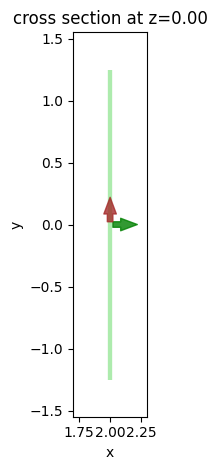

In [6]:
source.plot(z=0)

In [8]:
gaussian_beam = GaussianBeamFdfd(
    size=[0, y_span/4, td.inf],
    center=[x_span/5, 0, 0],
    direction='+',
    wavelength=2.0 * 1e-6
)

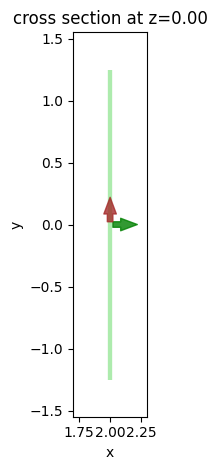

In [9]:
gaussian_beam.plot(z=0);